In [3]:
#User Input
#lib_type = "single_end"
#seq_platform = "illumina"
#read_length = 100

In [1]:
library("dada2")
library("phyloseq")
library('SpiecEasi')

Loading required package: Rcpp


In [2]:
file_names = list.files(path="../data/fastq")
input_files = paste0("../data/fastq/",file_names)

In [7]:
#Filter and Trim the reads

filtFs = paste0("../data/fastq_filtered/",file_names,"_filt.fastq")
filterAndTrim(input_files, filtFs,
                     maxN=0, truncQ=1, rm.phix=TRUE, compress=FALSE, verbose=TRUE, multithread=TRUE)

In [6]:
?filterAndTrim

filterAndTrim {dada2},R Documentation
fwd,(Required). character. The path(s) to the input fastq file(s).
filt,"(Required). character. The path(s) to the output filtered file(s) corresponding to the fwd input files. If containing directory does not exist, it will be created."
rev,"(Optional). Default NULL. The path(s) to the input reverse fastq file(s) from paired-end sequence data corresponding to those provided to the fwd argument. If NULL, the fwd files are processed as single-reads."
filt.rev,"(Optional). Default NULL, but required if rev is provided. The path(s) to the output fastq file(s) corresponding to the rev input. Can also provide a directory, which if not existing will be created (how to differentiate between dir/file in len1 case?)."
compress,"(Optional). Default TRUE. If TRUE, the output fastq file(s) are gzipped. FILTERING AND TRIMMING PARAMETERS ——— Note: When filtering paired reads... If a length 1 vector is provided, the same parameter value is used for the forward and reverse reads. If a length 2 vector is provided, the first value is used for the forward reads, and the second for the reverse reads."
truncQ,(Optional). Default 2. Truncate reads at the first instance of a quality score less than or equal to truncQ.
truncLen,(Optional). Default 0 (no truncation). Truncate reads after truncLen bases. Reads shorter than this are discarded.
trimLeft,"(Optional). Default 0. The number of nucleotides to remove from the start of each read. If both truncLen and trimLeft are provided, filtered reads will have length truncLen-trimLeft."
maxLen,(Optional). Default Inf (no maximum). Remove reads with length greater than maxLen. maxLen is enforced before trimming and truncation.
minLen,(Optional). Default 20. Remove reads with length less than minLen. minLen is enforced after trimming and truncation.


In [5]:
filterAndTrim(input_files[1],filtFs[1], maxN=0, maxEE=c(2,2), truncQ=1, rm.phix=TRUE, compress=FALSE, verbose=TRUE, multithread=TRUE)

Warning message in if (maxEE < Inf) {:
“the condition has length > 1 and only the first element will be used”Warning message in C_matrixEE(qq) <= maxEE:
“longer object length is not a multiple of shorter object length”The filter removed all reads: ../data/fastq_filtered/ERR1745019.fastq_filt.fastq not written.
Warning message in filterAndTrim(input_files[1], filtFs[1], maxN = 0, maxEE = c(2, :
“No reads passed the filter. Please revisit your filtering parameters.”

In [43]:
plotQualityProfile(filtFs, aggregate=True)

ERROR: Error: Input/Output
  no input files found
  dirPath: ../data/fastq/ERR1745019.fastq_filt.fastq
  pattern: character(0)



Not all sequences were the same length.
7961221 total bases in 50500 reads from 2 samples will be used for learning the error rates.
Initializing error rates to maximum possible estimate.
selfConsist step 1 ..
   selfConsist step 2
   selfConsist step 3
   selfConsist step 4
Convergence after  4  rounds.


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

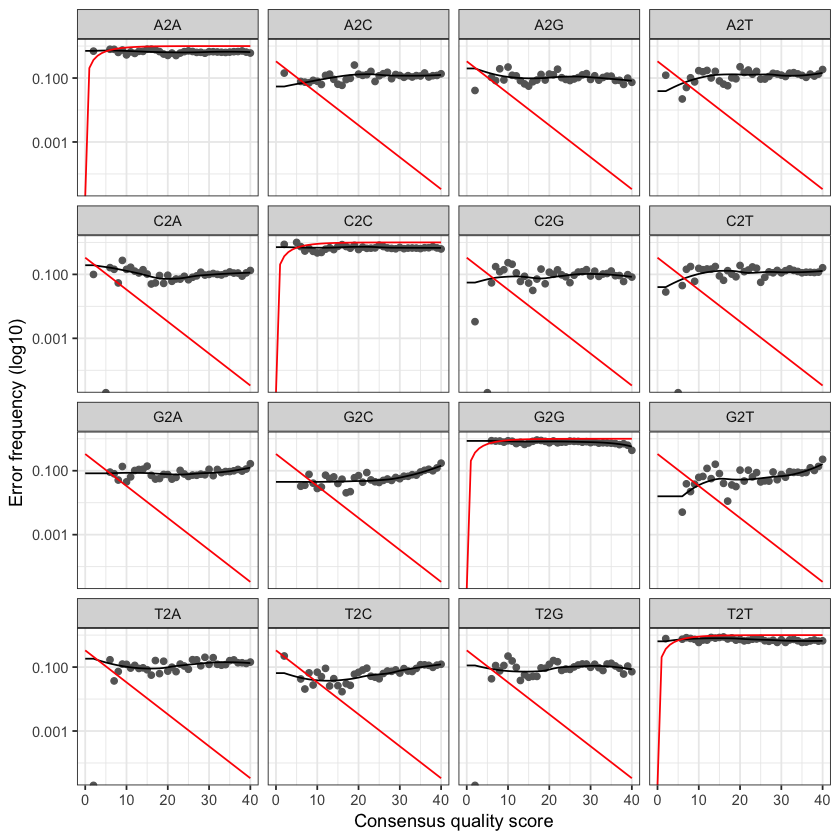

In [14]:
#Parse filtered files to learn error rates, infer sequence variants and construct a seq-table

#filtered_files = list.files(filtpath, pattern="fastq.gz", full.names=TRUE)
#samples = sapply(basename(filtFs))
#names(filtFs) = basename(input_files)

error_rates = learnErrors(filtFs, multithread=TRUE, randomize=TRUE)
plotErrors(error_rates, nominalQ=TRUE)


In [30]:
seq_variants = vector("list", length(file_names))
names(seq_variants) = filtFs

for (i in filtFs){
    #dereplicated = derepFastq(filtFs[[i]])
    dereplicated = derepFastq(i)
    seq_variants[[i]] = dada(dereplicated, err=error_rates, multithread=TRUE)}
    
sequence_table = makeSequenceTable(seq_variants)

Sample 1 - 1180 reads in 1076 unique sequences.
Not all sequences were the same length.
Sample 1 - 49320 reads in 49206 unique sequences.


The sequences being tabled vary in length.


In [53]:
#Remove chimeras and assign taxonomy
#system("wget https://zenodo.org/record/158955/files/gg_13_8_train_set_97.fa.gz?download=1")
sequence_table = removeBimeraDenovo(sequence_table, method="consensus", multithread=TRUE)
taxa_assign = assignTaxonomy(sequence_table, "gg_13_8_train_set_97.fa.gz", multithread=TRUE)


In [51]:
#Create Metadata and Get OTU Table
phyloseqobj = phyloseq(otu_table(sequence_table, taxa_are_rows=FALSE, tax_table(taxa_assign)))
otu = otu_table(phyloseqobj)
otu
#taxa.gg13_8.id <- assignTaxonomy(colnames(sequence_table), refFasta="/Users/ashika/Documents/PrIMP/gg_13_5_otus/rep_set/99_otus.fasta")
#taxa.gg13_8.id

,AGATACGTTTGGTTTCCAAGAACGACAAACGCAATCGCCTCTTTAGCGTCTGAGGAATAACCGAGCGACTCTTGAGTAATTAACGAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTATCAT,TGGATGGAACTTGGAATAATATAGAAGCTCTTGCCTGTCTTTCTGGCAAAACTACGAAGCAGTACGCCGACAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAAAA,TAAGCTCCAGAAGGAGTTGCTGCACCGTTATGACGATACCCGACTCACCACCGTGGCGATGCATCCACATCGGCTTAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAA,TATTTGATCATTCCGGTAGGGTCCATTCGATGTTGATTCCATTGGAGTGCATTCGATGATTCCATTCGATTAACGAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAA,TCCTACAAACCTGCGTTCGTCGGTTACGGTAATCAATACGTTGCTTAACGGAGTTATGGGCGGACATTTACACAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAA,AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAAACCATGGGCTCAACCCATGAATTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGATGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGTCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCAAACCCTGTTTGCTACCCATGCTTTCGAGCCTCAGCGTCAGTTGGTGCCCAGTAGACCGCCTTCGCCACTGGTGTTCCTCCCGATATCTACGCATTCCACCGCTACACCGGGAATTCCATCTACCTCTGCACTACTCAAGAAAAACAGTTTTGAAAGCAATTCATGGGTTGAGCCCATGGTTTTCACTTCCAACTTGTCTTCCCGCCTGCGCTCCCTTTACACCCAGTAATTCCGGACAACGCTTGCACCCTAC,TCTGGCTAGATCTAATTTTTGTATTTTTAATAGAGATGGGGTTTCACCATGTTGGCCAGACTGGTCTCAAACTCCTGACCTCATTATAGGAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTC,TAACGGGCAATTAACCGCAAAGTCATATTTACTGCAACAGCAGCTCAGGCCATCGACTTTGCCAGTGTACGAGCAAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAAAAA,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACCCTGTTTGCTCCCCACGCTTTCGCACCTGAGCGTCAGTCTTCGTCCAGGGGGCCGCCTTCGCCACCGGTATTCCTCCAGATCTCTACGCATTTCACCGCTACACCTGGAATTCTACCCCCCTCTACGAGACTCAAGCTTGCCAGTATCAGATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCTGACTTAACAAACCGCCTGCGTGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCCCCCCCC,TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGGGAACGCAGGCGGTCTTTTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGAAGTAGTGCATTGGAAACTGGAAGACTTGAGTGCAGAAGAGGAGAGTGGAACTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAAGAACACCAGTGGCGAAAGCGGCTCTCTGGTCTGTAACTGACGCTGAGGTTCGAAAGCGTGGGTAGCAAACCCTGTTTGCTACCCACGCTTTCGAACCTCAGCGTCAGTTACAGACCAGAGAGCCGCTTTCGCCACTGGTGTTCTTCCATATATCTACGCATTTCACCGCTACACATGGAGTTCCACTCTCCTCTTCTGCACTCAAGTCTTCCAGTTTCCAATGCACTACTTCGGTTAAGCCGAAGGCTTTCACATCAGACTTAAAAGACCGCCTGCGTTCCCTTTACGCCCAATAAATCCGGACAACGCTCGCCCCCCCC,⋯,TAAGGCTTTTTGCCGTAGAACTCCGTCACTCGTTCTATAAACGAACGCAAGTCAGTAATAAAAGCCTCATCACTCACGAGCAAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTT,TCCCGAAAGTCGTATTCAAGTCACCAGTCACTTGAGACTCCTAATCCCTAATCCCTAATCCCTAGTCACTAGTCACTAGTCACTAGTCACATCGGCTTAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTA,TGCTGACTGTAGCTAATGCAGCACCGGAAATGCCGAGCGCAGGGAAGCCGAAGTGCCCGTTGATCAGTAGATAGTTCAAAATAATATTGATACGATTTTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTG,TGATGTTGAGCGAACGGGCAAAGCCCTTGGCAAAGCTCACACCCACGAGCAGAGAACCCATCAAGCCCGGTCCACGGGTGAAGGCAACGATCGGCTTAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTAT,TGCAATCGTGAGCCTGGCGGAAGATCCTGTCTTTCTCCTCCTCTTCTTTCTGCTTTTTCTCAGCCTTTTCCAAATACACTAGATTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTATCATT,TAAAGATAGAGGATTCGAAACGCGCGTCTTCTTGTTCTTCGTCTTGCTTTTTCTTTGCCTTCGGAGCGGGGTCGTTGAGGTGAATGCGGATTAACGAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTAT,TGCTGGTGTTGGAGTTGCTTTTACGGCAAAATATTCCTTAAACCCTTTATTCCAAGCAAAGGCTTTGTTCAAAGCGCGAGCCTTTTATCTGCGCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGC,TGATTCCGTGCTTGGAACAAAGAAATGATGCACAATCCTATCAAGGATGGCACGATATTTCGCCATGACTGGATTCGCTATCTGCGCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTATCA,TGGCACAAGGAATGGAGCCACGCATCTTCTTGTCGGTCAGAGAACAGATGTCGTTATGGCCAAACTCGATGTTTAACGAAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTGAAA,TAAAACCGCCATCTGCCAGGTTCATGCAACACCATGATAGTGGTAAAGAAATTAACGACTGAGGTTATTCCTCATTTTGGCACTTGCCTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTAT
ERR520895_filt.fastq,0,0,0,0,0,10,0,0,6,6,⋯,0,

In [ ]:
#Get pathway annotation using picrust


system.time(FUNCTIONS <- picrust(otu,rows_are_taxa=FALSE,
                                 reference='gg_ko', reference_path="./refs",
                                 cn_normalize=TRUE,sample_normalize=FALSE,
                                 drop=TRUE))


Warning message in cnn(otu_table, rows_are_taxa = FALSE, drop = drop):
“OTU IDs must be integer strings of the form GreenGenes 16.X. Returning unnormalized OTU table.”